In [1]:
# Import libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = 17

In [3]:
# Create data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    rotation_range=20,         # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    horizontal_flip=True,     # Randomly flip images horizontally
    validation_split=0.2      # Split the data into training and validation sets
)

train_generator = train_datagen.flow_from_directory(
    'Main/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'Main/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1109 images belonging to 17 classes.
Found 138 images belonging to 17 classes.


In [4]:
# Create the MobileNet model with pre-trained weights
base_model = MobileNet(
    include_top=False,
    weights='imagenet',
    input_shape=(*IMAGE_SIZE, 3)  # Adjusting the input shape according to the image dimensions
)

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Training the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Save the trained model
model.save('main.h5')

Epoch 1/30
34/34 [==============================] - 41s 1s/step - loss: 2.1235 - accuracy: 0.4039 - val_loss: 1.3471 - val_accuracy: 0.5703
Epoch 2/30
34/34 [==============================] - 32s 945ms/step - loss: 1.0126 - accuracy: 0.6704 - val_loss: 1.0983 - val_accuracy: 0.6719
Epoch 3/30
34/34 [==============================] - 32s 948ms/step - loss: 0.7776 - accuracy: 0.7400 - val_loss: 1.2220 - val_accuracy: 0.6094
Epoch 4/30
34/34 [==============================] - 32s 949ms/step - loss: 0.6452 - accuracy: 0.7799 - val_loss: 1.0081 - val_accuracy: 0.6484
Epoch 5/30
34/34 [==============================] - 33s 974ms/step - loss: 0.4984 - accuracy: 0.8412 - val_loss: 1.0449 - val_accuracy: 0.6328
Epoch 6/30
34/34 [==============================] - 32s 944ms/step - loss: 0.4255 - accuracy: 0.8579 - val_loss: 1.0845 - val_accuracy: 0.6797
Epoch 7/30
34/34 [==============================] - 32s 927ms/step - loss: 0.3612 - accuracy: 0.8830 - val_loss: 0.9951 - val_accuracy: 0.6719
Ep

F:\SRAVANTHI\project\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 692 images belonging to 17 classes.
22/22 [==============================] - 19s 833ms/step
              precision    recall  f1-score   support

           0       0.63      0.87      0.73        30
           1       0.90      0.93      0.92        30
           2       0.93      0.83      0.88        30
           3       0.83      0.83      0.83        30
           4       0.98      0.75      0.85        56
           5       0.71      0.64      0.67        45
           6       0.85      0.44      0.58        50
           7       0.86      0.59      0.70        51
           8       0.94      0.97      0.95        30
           9       0.90      0.87      0.88        30
          10       1.00      0.90      0.95        30
          11       0.75      0.86      0.80        50
          12       0.97      1.00      0.98        30
          13       0.79      1.00      0.88        50
          14       0.60      0.86      0.70        50
          15       0.81      0.94    

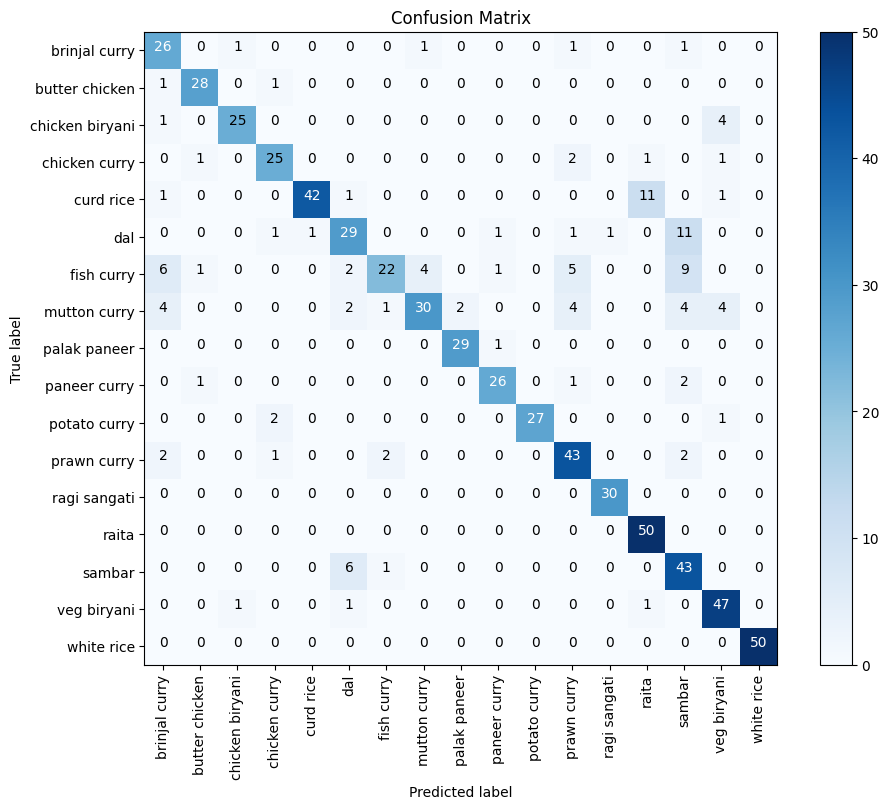

In [6]:
# Load the saved model
model = load_model('main.h5')  # Replace with the actual path to your saved model

class_labels = ['brinjal curry', 'butter chicken', 'chicken biryani', 'chicken curry', 'curd rice', 
                'dal', 'fish curry', 'mutton curry', 'palak paneer',  'paneer curry', 'potato curry',
                'prawn curry', 'ragi sangati', 'raita', 'sambar', 'veg biryani', 'white rice']

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'Main/test',  # Replace with the path to your test data directory
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to keep track of image labels
)

# Get true labels from the test dataset
true_labels = test_generator.classes

# Make predictions on the test data
predictions = model.predict(test_generator)

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate and print classification report
print(classification_report(true_labels, predicted_labels))

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Calculate and print overall accuracy
overall_accuracy = np.mean(true_labels == predicted_labels)
print("Overall Accuracy:", overall_accuracy)

# Show the confusion matrix graph
plt.show()


In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('main.h5')  # Replace with the actual path to your saved model

# Load and preprocess the test image
img_path = 'Main/test/white rice/(19).jpeg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size according to your model
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.  # Rescale pixel values to [0, 1]

# Make predictions
predictions = model.predict(img)
class_labels = ['brinjal curry', 'butter chicken', 'chicken biryani', 'chicken curry', 'curd rice', 
                'dal', 'fish curry', 'mutton curry', 'palak paneer',  'paneer curry', 'potato curry',
                'prawn curry', 'ragi sangati', 'raita', 'sambar', 'veg biryani', 'white rice']

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 387ms/step
Predicted class: white rice
